In [1]:
%matplotlib widget

import os
import sys
import matplotlib.pyplot as plt
from IPython import embed
import pickle

sys.path.append(os.path.abspath("/develop/code/evaluation"))
import evaluation_3 as eval

Using MPI version 4.0, 1 processes


Global seed set to 1337


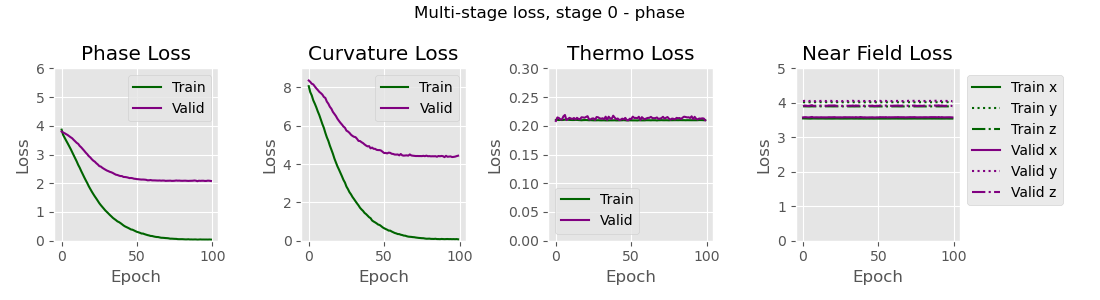

In [8]:
exp_name = "baseline" # 0. phase | 1. curv | 2. recon/thermo | 3. phase/thermo 

loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval = eval.get_results(exp_name, stage=0)
eval.plot_loss(loss, loss, loss, loss, "stage 0 - phase")

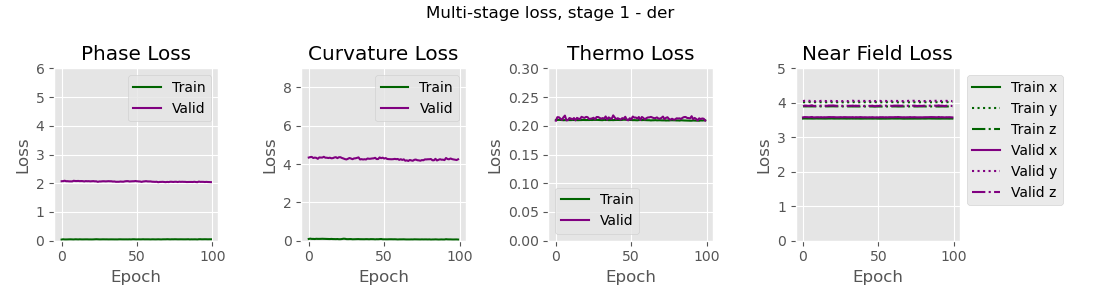

In [10]:
loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval = eval.get_results(exp_name, stage=1)
plt.close("all")
eval.plot_loss(loss, loss, loss, loss, "stage 1 - der")

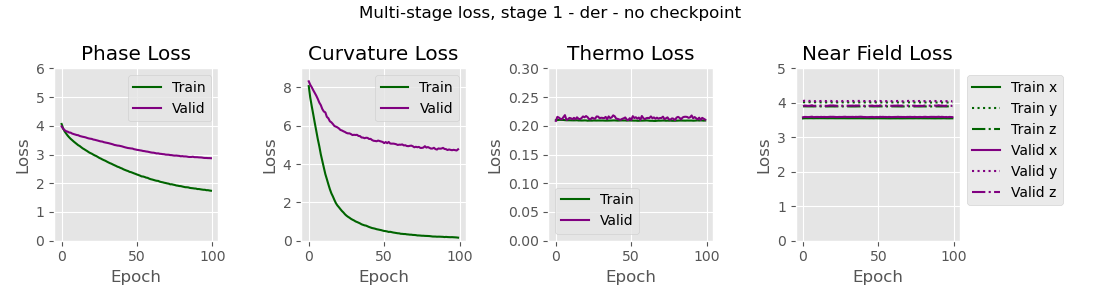

In [12]:
loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval = eval.get_results(exp_name, stage=1, folder_name = "baseline_1_nockpt")
plt.close("all")
eval.plot_loss(loss, loss, loss, loss, "stage 1 - der - no checkpoint")

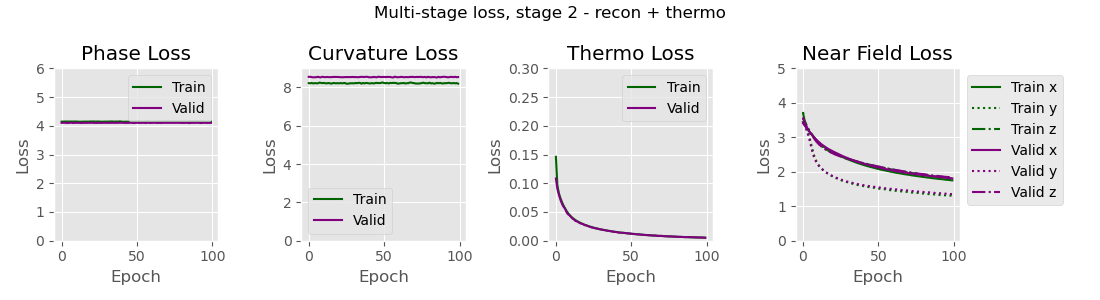

In [14]:
loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval = eval.get_results(exp_name, stage=2)
plt.close("all")
eval.plot_loss(loss, loss, loss, loss, "stage 2 - recon + thermo")

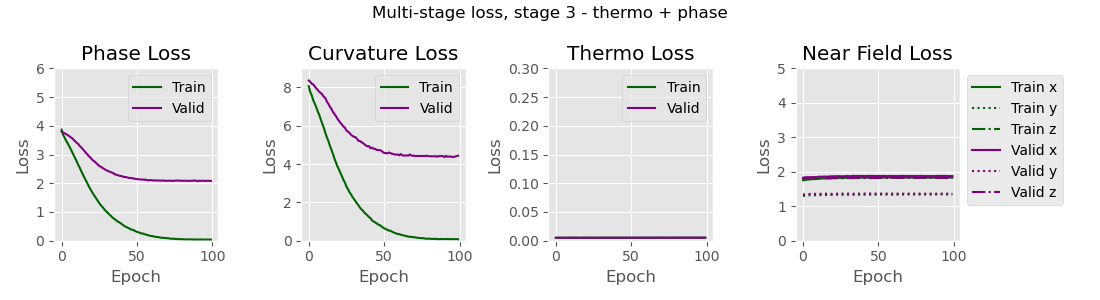

In [22]:
loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval, resim_train_results, resim_valid_results = eval.get_results(exp_name, stage=3, resim=True, resim_index=1)
plt.close("all")
eval.plot_loss(loss, loss, loss, loss, "stage 3 - thermo + phase")

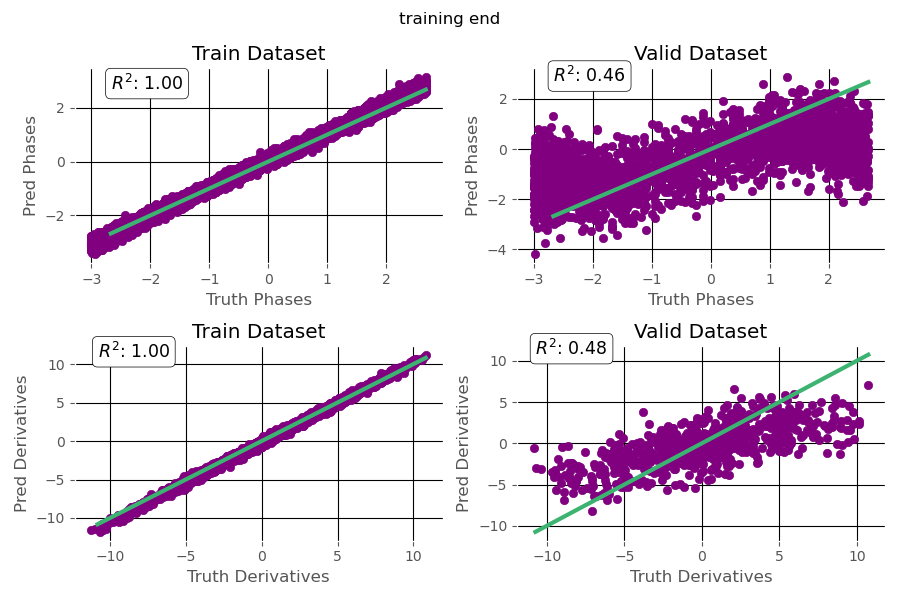

In [23]:
plt.close("all")
title = "training end"
eval.regression_plots(title, encoder_train, encoder_valid, save_fig=False)

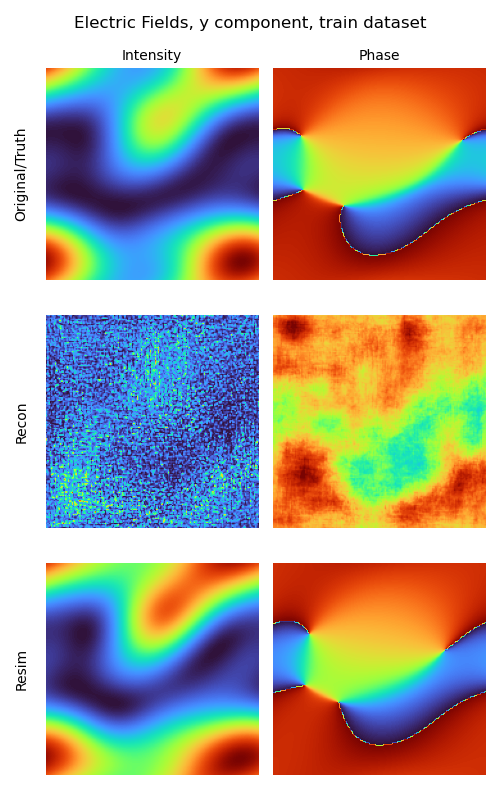

In [24]:
eval.plot_dft_fields(resim_train_eval['nf_1550_truth'], resim_train_eval['nf_1550_pred'], resim_train_results['all_near_fields']['near_fields_1550'], idx=1, id="train")

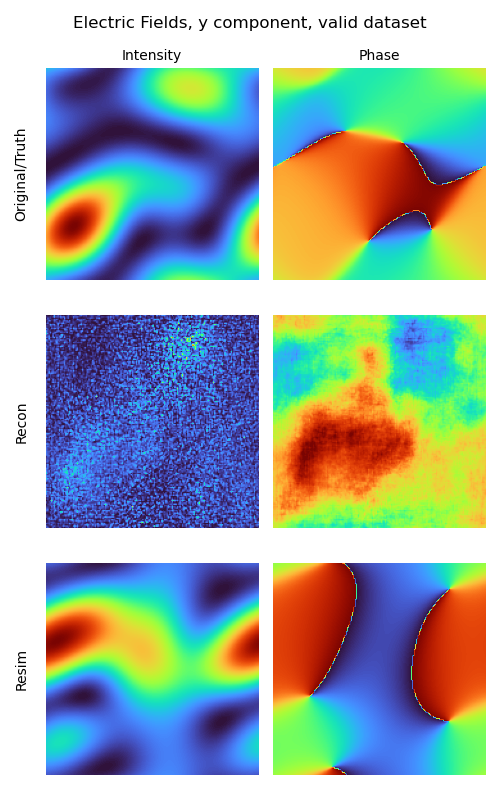

In [25]:
eval.plot_dft_fields(resim_valid_eval['nf_1550_truth'], resim_valid_eval['nf_1550_pred'], resim_valid_results['all_near_fields']['near_fields_1550'], idx=1, id="valid")

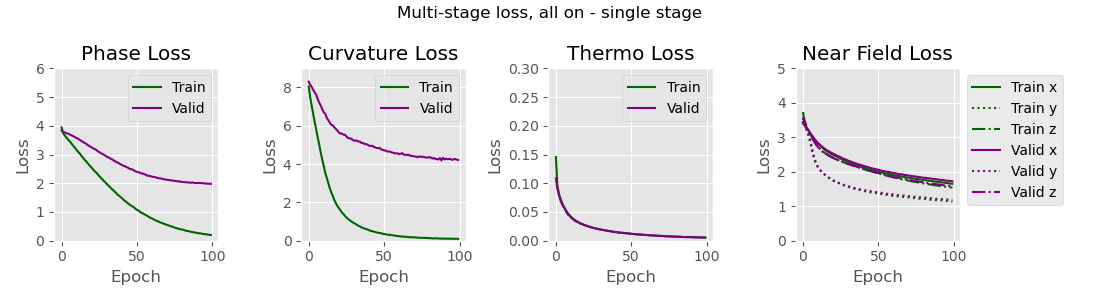

In [26]:
exp_name = "all_on" 
#all_on = "allOnPSNR"

loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval, resim_train_results, resim_valid_results = eval.get_results(exp_name, stage=None, resim=True, resim_index=1, folder_name = exp_name)
eval.plot_loss(loss, loss, loss, loss, "all on - single stage")

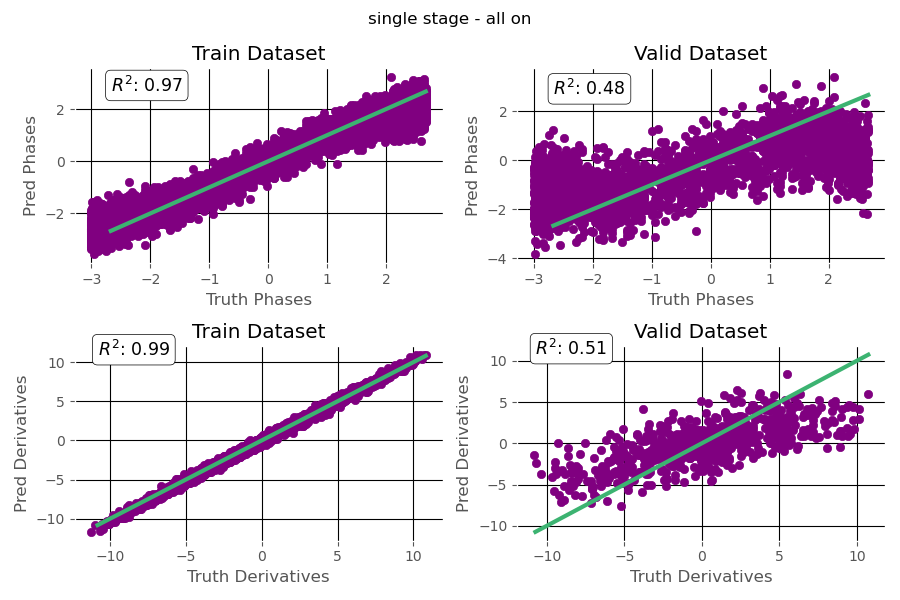

In [27]:
plt.close("all")
title = "single stage - all on"
eval.regression_plots(title, encoder_train, encoder_valid, save_fig=False)

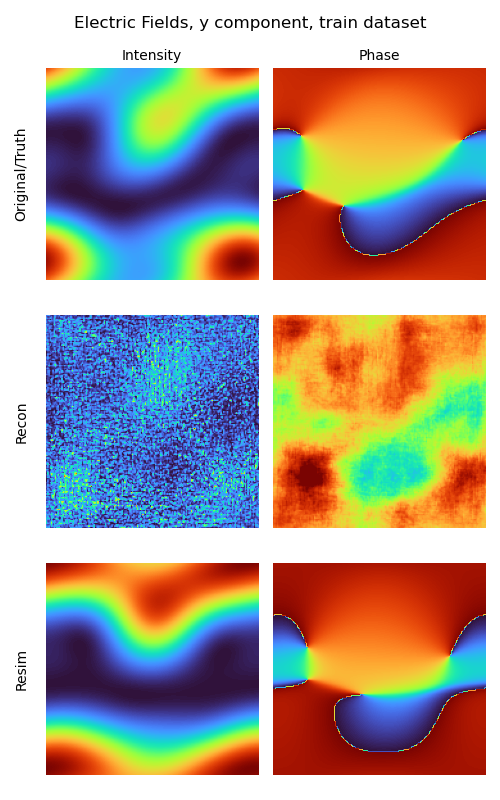

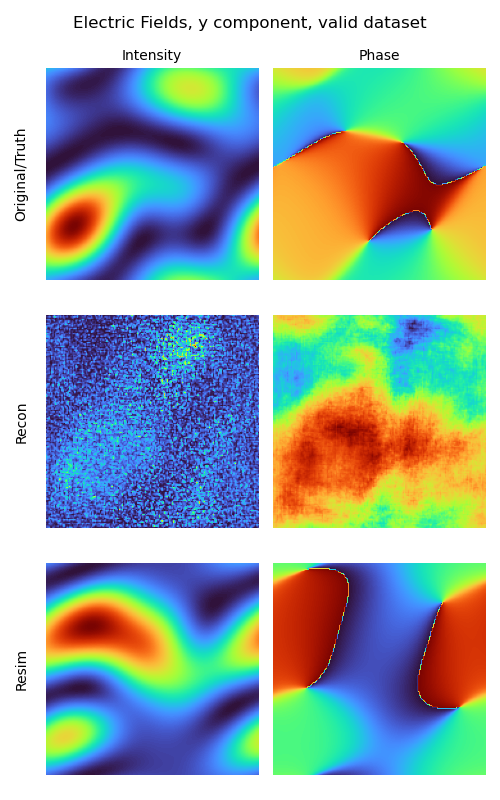

In [28]:
plt.close("all")
eval.plot_dft_fields(resim_train_eval['nf_1550_truth'], resim_train_eval['nf_1550_pred'], resim_train_results['all_near_fields']['near_fields_1550'], idx=1, id="train")
eval.plot_dft_fields(resim_valid_eval['nf_1550_truth'], resim_valid_eval['nf_1550_pred'], resim_valid_results['all_near_fields']['near_fields_1550'], idx=1, id="valid")

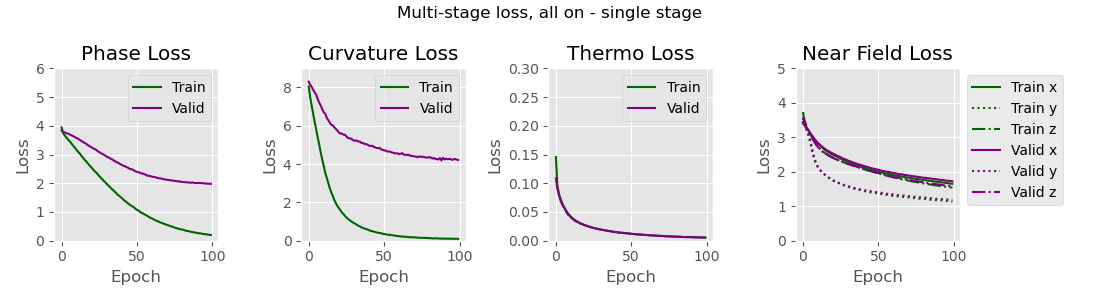

In [29]:
all_on = "allOnPSNR"

loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval, resim_train_results, resim_valid_results = eval.get_results(exp_name, stage=None, resim=True, resim_index=1, folder_name = exp_name)
eval.plot_loss(loss, loss, loss, loss, "all on - single stage")

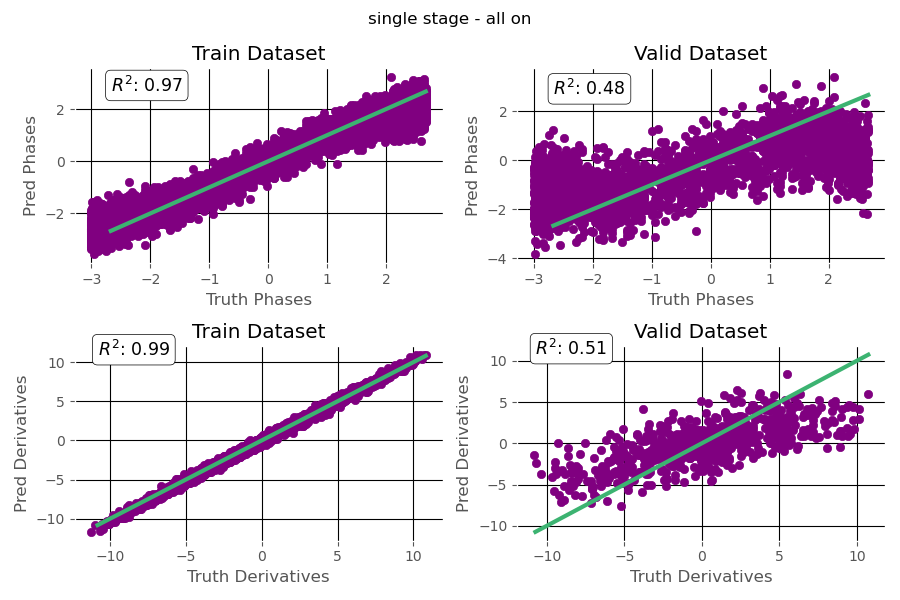

In [30]:
plt.close("all")
title = "single stage - all on"
eval.regression_plots(title, encoder_train, encoder_valid, save_fig=False)

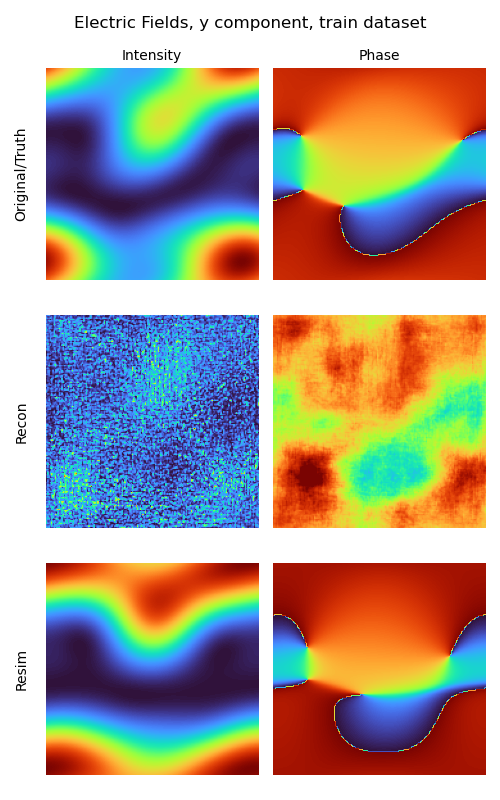

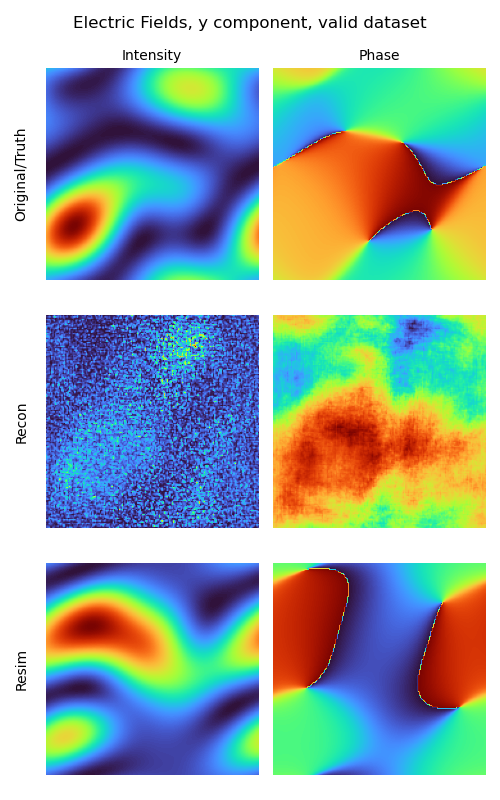

In [31]:
plt.close("all")
eval.plot_dft_fields(resim_train_eval['nf_1550_truth'], resim_train_eval['nf_1550_pred'], resim_train_results['all_near_fields']['near_fields_1550'], idx=1, id="train")
eval.plot_dft_fields(resim_valid_eval['nf_1550_truth'], resim_valid_eval['nf_1550_pred'], resim_valid_results['all_near_fields']['near_fields_1550'], idx=1, id="valid")

In [32]:
import numpy as np
def build_custom_conf_matrices(original, recon, resim, similarity = True, savefig = False):

    resim = np.asarray(resim)
    resim_amp =np.abs(resim)
    resim_phase = np.angle(resim)

    resim = np.stack([resim_amp, resim_phase], axis=1)
    
    original = torch.from_numpy(original)
    recon = torch.from_numpy(recon)
    resim = torch.from_numpy(resim)
    
    original_amplitude = original[:,0,:,:]
    recon_amplitude = recon[:,0,:,:]
    resim_amplitude = resim[:,0,:,:]

    original_phase = original[:,1,:,:]
    recon_phase = recon[:,1,:,:]
    resim_phase = resim[:,1,:,:]

    amplitude_conf_matrix = eval.calculate_matrix(original_amplitude, recon_amplitude, resim_amplitude, similarity)
    phase_conf_matrix = eval.calculate_matrix(original_phase, recon_phase, resim_phase, similarity)

    return amplitude_conf_matrix, phase_conf_matrix

def plot_custom_confusion_matrix(amplitude_matrix, phase_matrix, similarity, savefig=False):
    
    fig,ax = plt.subplots(1,2,figsize=(8,5))

    plt.suptitle("PSNR",fontsize=14) if similarity is True else plt.suptitle("Dissimilarity",fontsize=14)
    
    cmap = 'Blues'
    ax[0].imshow(amplitude_matrix, cmap=cmap, alpha=1)
    ax[0].set_title('Amplitude', fontsize=10)
    
    ax[1].imshow(phase_matrix, cmap=cmap, alpha=1)
    ax[1].set_title('Phase', fontsize=10)
    
    ax[0].set_xticks([0,1,2])
    ax[0].set_yticks([0,1,2])
    
    ax[0].set_xticklabels(['Original', 'Recon', 'Resim'], fontsize=10)
    ax[0].set_yticklabels(['Original', 'Recon', 'Resim'], fontsize=10)
    #ax[0].yaxis.tick_right()
    ax[0].yaxis.set_tick_params(rotation=90)
    
    ax[1].set_xticks([0,1,2])
    ax[1].set_yticks([0,1,2])
    
    ax[1].set_xticklabels(['Original', 'Recon', 'Resim'], fontsize=10)
    ax[1].set_yticklabels(['Original', 'Recon', 'Resim'], fontsize=10)
    ax[1].yaxis.set_tick_params(rotation=90)
    #ax[1].yaxis.tick_right()
    
    for i in ax:
        i.grid(False)

    cmap_blues = cm.get_cmap(cmap)
    dark_blue = cmap_blues(0.95)
    
    for i in range(amplitude_matrix.shape[0]):
        for j in range(amplitude_matrix.shape[1]):
            value = amplitude_matrix[i, j]
            color = 'white' if value != 0 else dark_blue
            ax[0].text(x=j, y=i,s=round(amplitude_matrix[i, j],2), va='center',ha='center', size='xx-large', color=color)
    
    
    for i in range(phase_matrix.shape[0]):
        for j in range(phase_matrix.shape[1]):
            value = amplitude_matrix[i, j]
            color = 'white' if value != 0 else dark_blue
            ax[1].text(x=j, y=i,s=round(phase_matrix[i, j],2), va='center',ha='center', size='xx-large', color=color)

    if savefig == True:
        title = 'PSNR' if similarity else 'Dissimilarity'
        fig.savefig(f"other_plots/{title}.pdf")
        
    plt.tight_layout()

In [33]:
plt.close("all")

similarity = True
amplitude_matrix, phase_matrix = build_custom_conf_matrices(nf_truth_train, nf_recon_train, 
                                                             nf_resim_train, similarity = similarity, savefig=False)
#eval.plot_custom_confusion_matrix(amplitude_matrix, phase_matrix, similarity=similarity, savefig=False)

NameError: name 'nf_truth_train' is not defined